In [1]:
import os
import argparse
import math
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.transforms import ToTensor, Compose, Normalize
from tqdm import tqdm

# from model import *
from utils import setup_seed

# # if __name__ == '__main__':
# parser = argparse.ArgumentParser()
# parser.add_argument('--seed', type=int, default=42)
# parser.add_argument('--batch_size', type=int, default=4096)
# parser.add_argument('--max_device_batch_size', type=int, default=512)
# parser.add_argument('--base_learning_rate', type=float, default=1.5e-4)
# parser.add_argument('--weight_decay', type=float, default=0.05)
# parser.add_argument('--mask_ratio', type=float, default=0.75)
# parser.add_argument('--total_epoch', type=int, default=2000)
# parser.add_argument('--warmup_epoch', type=int, default=200)
# parser.add_argument('--model_path', type=str, default='vit-t-mae.pt')

# args = parser.parse_args()

# setup_seed(args.seed)

batch_size = 128
load_batch_size = min(512, batch_size)

# assert batch_size % load_batch_size == 0
# steps_per_update = batch_size // load_batch_size

train_dataset = torchvision.datasets.CIFAR10('data', train=True, download=True, transform=Compose([ToTensor(), Normalize(0.5, 0.5)]))
val_dataset = torchvision.datasets.CIFAR10('data', train=False, download=True, transform=Compose([ToTensor(), Normalize(0.5, 0.5)]))
dataloader = torch.utils.data.DataLoader(train_dataset, load_batch_size, shuffle=True, num_workers=4)
writer = SummaryWriter(os.path.join('logs', 'cifar10', 'mae-pretrain'))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# model = MAE_ViT(mask_ratio=args.mask_ratio).to(device)
# optim = torch.optim.AdamW(model.parameters(), lr=args.base_learning_rate * args.batch_size / 256, betas=(0.9, 0.95), weight_decay=args.weight_decay)
# lr_func = lambda epoch: min((epoch + 1) / (args.warmup_epoch + 1e-8), 0.5 * (math.cos(epoch / args.total_epoch * math.pi) + 1))
# lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optim, lr_lambda=lr_func, verbose=True)

# step_count = 0
# optim.zero_grad()
# for e in range(args.total_epoch):
#     model.train()
#     losses = []
#     for img, label in tqdm(iter(dataloader)):


2024-06-19 21:04:39.057854: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Files already downloaded and verified
Files already downloaded and verified


In [11]:
res = next(iter(dataloader))

In [15]:
res[0].shape

torch.Size([128, 3, 32, 32])

In [16]:
res[1].shape

torch.Size([128])

In [18]:
import matplotlib.pyplot as plt

In [28]:
res[0][0].shape

torch.Size([3, 32, 32])

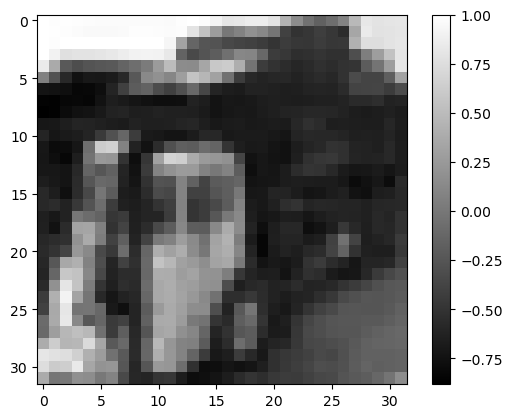

In [34]:
plt.imshow(res[0][100][0], cmap = 'gray')
plt.colorbar()

In [49]:
intensity_scale

1000.0

In [1]:
# import os
# import torch
# import torchvision
# from torchvision.transforms import ToTensor, Compose, Normalize
# from torch.utils.tensorboard import SummaryWriter
# from diffsim_torch import illuminate_and_diffract
# import torchvision.utils as vutils

# # Parameters
# intensity_scale = 1000.
# save_dir = 'diffracted_images'
# os.makedirs(save_dir, exist_ok=True)

# # Dataset and DataLoader
# batch_size = 128
# load_batch_size = min(512, batch_size)
# #transform = Compose([ToTensor(), Normalize(0.5, 0.5)])
# transform = Compose([ToTensor()])
# train_dataset = torchvision.datasets.CIFAR10('data', train=True, download=True, transform=transform)
# dataloader = torch.utils.data.DataLoader(train_dataset, load_batch_size, shuffle=True, num_workers=4)

# # SummaryWriter
# writer = SummaryWriter(os.path.join('logs', 'cifar10', 'mae-pretrain'))

# # Device setup
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# probe = get_default_probe()[:, :, 0] # torch.ones_like(Y_I) * 

# def diffraction_from_channels(batch, probe, intensity_scale = 1000.):
#     print(f"Input batch shape: {batch.shape}, Data type: {batch.dtype}")

#     Y_I = batch[:, 0]  # Extract Y_I from the first channel
#     Y_phi = (batch[:, 1])# + batch[:, 2]) / 2  # Calculate Y_phi as the average of the second and third channels

# #     print(f"Y_I shape: {Y_I.shape}, Data type: {Y_I.dtype}")
# #     print(f"Y_phi shape: {Y_phi.shape}, Data type: {Y_phi.dtype}")
    
#     # Create a complex tensor by combining Y_I and Y_phi
#     Y_complex = torch.complex(Y_I, Y_phi)
    
# #     print(f"Y_complex shape: {Y_complex.shape}, Data type: {Y_complex.dtype}")
    
# #     print(f"Probe shape: {probe.shape}, Data type: {probe.dtype}")
    
#     # Apply the illuminate_and_diffract() function
#     X = illuminate_and_diffract(Y_complex, probe, intensity_scale= intensity_scale)
    
# #     print(f"Diffracted X shape: {X.shape}, Data type: {X.dtype}")
    
#     # Reshape the output to match the expected shape (N, C, H, W)
#     diffracted_batch = X.view(-1, 1, X.shape[1], X.shape[2]).repeat(1, 3, 1, 1)
    
# #     print(f"Diffracted batch shape: {diffracted_batch.shape}, Data type: {diffracted_batch.dtype}")
    
#     return diffracted_batch # diffracted amplitude


# for batch_idx, (batch, _) in enumerate(dataloader):
#     diffracted_batch = diffraction_from_channels(batch)
#     for i, img in enumerate(diffracted_batch):
#         vutils.save_image(img, os.path.join(save_dir, f'diffracted_{batch_idx}_{i}.png'))
#     writer.add_images('Diffracted Images', diffracted_batch, dataformats='NCHW')

# writer.close()

import os
import torch
import torchvision
from torchvision.transforms import ToTensor, Compose
from torch.utils.tensorboard import SummaryWriter
from diffsim_torch import illuminate_and_diffract
import torchvision.utils as vutils


from torch_probe import probe

# Parameters
intensity_scale = 1000.
save_dir_train = 'diffracted_images/train'
save_dir_test = 'diffracted_images/test'
os.makedirs(save_dir_train, exist_ok=True)
os.makedirs(save_dir_test, exist_ok=True)

# Dataset and DataLoader
batch_size = 128
load_batch_size = min(512, batch_size)
transform = Compose([ToTensor()])

# Train dataset and DataLoader
train_dataset = torchvision.datasets.CIFAR10('data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, load_batch_size, shuffle=False, num_workers=4)

# Test dataset and DataLoader
test_dataset = torchvision.datasets.CIFAR10('data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, load_batch_size, shuffle=False, num_workers=4)

# SummaryWriter
writer = SummaryWriter(os.path.join('logs', 'cifar10', 'mae-pretrain'))

# Device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# # Initialize probe
# probe = get_default_probe()[:, :, 0]

from diffsim_torch import diffraction_from_channels

def process_and_save(dataloader, save_dir, writer, phase):
    for batch_idx, (batch, _) in enumerate(dataloader):
        batch = (batch + torch.flip(batch, dims=[2, 3])) / 2
        diffracted_batch = diffraction_from_channels(batch, probe)
        print(f"Processing {phase} batch {batch_idx + 1}")
        for i, img in enumerate(diffracted_batch):
            vutils.save_image(img, os.path.join(save_dir, f'{phase}_{batch_idx}_{i}.png'))
        writer.add_images(f'Diffracted Images/{phase}', diffracted_batch, batch_idx, dataformats='NCHW')
    return batch, diffracted_batch

# Process and save train data
process_and_save(train_loader, save_dir_train, writer, 'train')

# Process and save test data
batch, diffracted_batch = process_and_save(test_loader, save_dir_test, writer, 'test')

writer.close()


2024-06-20 17:37:31.969328: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Files already downloaded and verified
Files already downloaded and verified
Processing train batch 1
Processing train batch 2
Processing train batch 3
Processing train batch 4
Processing train batch 5
Processing train batch 6
Processing train batch 7
Processing train batch 8
Processing train batch 9
Processing train batch 10
Processing train batch 11
Processing train batch 12
Processing train batch 13
Processing train batch 14
Processing train batch 15
Processing train batch 16
Processing train batch 17
Processing train batch 18
Processing train batch 19
Processing train batch 20
Processing train batch 21
Processing train batch 22
Processing train batch 23
Processing train batch 24
Processing train batch 25
Processing train batch 26
Processing train batch 27
Processing train batch 28
Processing train batch 29
Processing train batch 30
Processing train batch 31
Processing train batch 32
Processing train batch 33
Processing train batch 34
Processing train batch 35
Processing train batch 

Processing train batch 307
Processing train batch 308
Processing train batch 309
Processing train batch 310
Processing train batch 311
Processing train batch 312
Processing train batch 313
Processing train batch 314
Processing train batch 315
Processing train batch 316
Processing train batch 317
Processing train batch 318
Processing train batch 319
Processing train batch 320
Processing train batch 321
Processing train batch 322
Processing train batch 323
Processing train batch 324
Processing train batch 325
Processing train batch 326
Processing train batch 327
Processing train batch 328
Processing train batch 329
Processing train batch 330
Processing train batch 331
Processing train batch 332
Processing train batch 333
Processing train batch 334
Processing train batch 335
Processing train batch 336
Processing train batch 337
Processing train batch 338
Processing train batch 339
Processing train batch 340
Processing train batch 341
Processing train batch 342
Processing train batch 343
P

In [2]:
%run produce_dataset.py

Files already downloaded and verified
Files already downloaded and verified
Processing train batch 1
Processing train batch 2
Processing train batch 3
Processing train batch 4
Processing train batch 5
Processing train batch 6
Processing train batch 7
Processing train batch 8
Processing train batch 9
Processing train batch 10
Processing train batch 11
Processing train batch 12
Processing train batch 13
Processing train batch 14
Processing train batch 15
Processing train batch 16
Processing train batch 17
Processing train batch 18
Processing train batch 19
Processing train batch 20
Processing train batch 21
Processing train batch 22
Processing train batch 23
Processing train batch 24
Processing train batch 25
Processing train batch 26
Processing train batch 27
Processing train batch 28
Processing train batch 29
Processing train batch 30
Processing train batch 31
Processing train batch 32
Processing train batch 33
Processing train batch 34
Processing train batch 35
Processing train batch 

Processing train batch 306
Processing train batch 307
Processing train batch 308
Processing train batch 309
Processing train batch 310
Processing train batch 311
Processing train batch 312
Processing train batch 313
Processing train batch 314
Processing train batch 315
Processing train batch 316
Processing train batch 317
Processing train batch 318
Processing train batch 319
Processing train batch 320
Processing train batch 321
Processing train batch 322
Processing train batch 323
Processing train batch 324
Processing train batch 325
Processing train batch 326
Processing train batch 327
Processing train batch 328
Processing train batch 329
Processing train batch 330
Processing train batch 331
Processing train batch 332
Processing train batch 333
Processing train batch 334
Processing train batch 335
Processing train batch 336
Processing train batch 337
Processing train batch 338
Processing train batch 339
Processing train batch 340
Processing train batch 341
Processing train batch 342
P

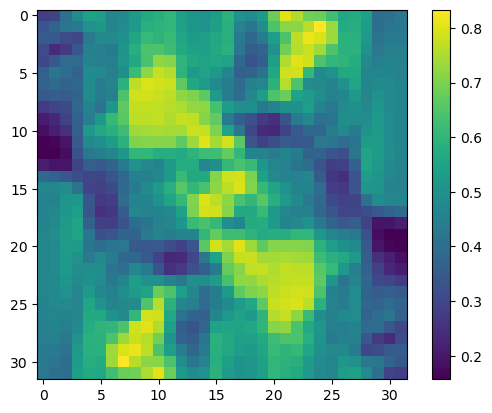

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow((batch[10, 0, ...]), cmap = 'viridis')
plt.colorbar()

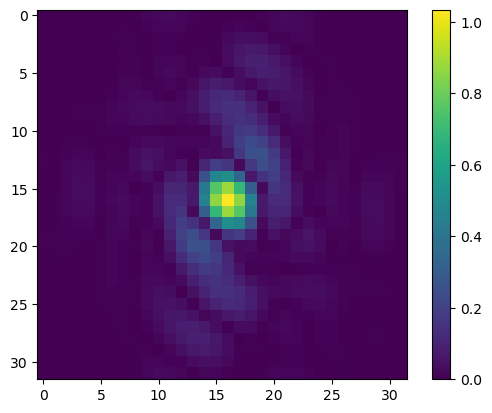

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow((diffracted_batch[20, 0, ...]), cmap = 'viridis')
plt.colorbar()

In [59]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, Normalize
import os

class FlatDirectoryDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.png')]
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Define the transform
#transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])
transform = Compose([ToTensor()])

# Create the custom dataset
diffracted_dataset = FlatDirectoryDataset(root_dir='diffracted_images', transform=transform)

# DataLoader
dataloader = DataLoader(diffracted_dataset, batch_size=128, shuffle=True, num_workers=4)

# Example usage in a training loop
for batch_idx, diffracted_batch in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}, shape: {diffracted_batch.shape}")
    # For verification purposes, you can save a batch and compare manually
    vutils.save_image(diffracted_batch, f'loaded_batch_{batch_idx}.png')


Batch 1, shape: torch.Size([128, 3, 32, 32])
Batch 2, shape: torch.Size([128, 3, 32, 32])
Batch 3, shape: torch.Size([128, 3, 32, 32])
Batch 4, shape: torch.Size([128, 3, 32, 32])
Batch 5, shape: torch.Size([128, 3, 32, 32])
Batch 6, shape: torch.Size([128, 3, 32, 32])
Batch 7, shape: torch.Size([128, 3, 32, 32])
Batch 8, shape: torch.Size([128, 3, 32, 32])
Batch 9, shape: torch.Size([128, 3, 32, 32])
Batch 10, shape: torch.Size([128, 3, 32, 32])
Batch 11, shape: torch.Size([128, 3, 32, 32])
Batch 12, shape: torch.Size([128, 3, 32, 32])
Batch 13, shape: torch.Size([128, 3, 32, 32])
Batch 14, shape: torch.Size([128, 3, 32, 32])
Batch 15, shape: torch.Size([128, 3, 32, 32])
Batch 16, shape: torch.Size([128, 3, 32, 32])
Batch 17, shape: torch.Size([128, 3, 32, 32])
Batch 18, shape: torch.Size([128, 3, 32, 32])
Batch 19, shape: torch.Size([128, 3, 32, 32])
Batch 20, shape: torch.Size([128, 3, 32, 32])
Batch 21, shape: torch.Size([128, 3, 32, 32])
Batch 22, shape: torch.Size([128, 3, 32, 32

Batch 184, shape: torch.Size([128, 3, 32, 32])
Batch 185, shape: torch.Size([128, 3, 32, 32])
Batch 186, shape: torch.Size([128, 3, 32, 32])
Batch 187, shape: torch.Size([128, 3, 32, 32])
Batch 188, shape: torch.Size([128, 3, 32, 32])
Batch 189, shape: torch.Size([128, 3, 32, 32])
Batch 190, shape: torch.Size([128, 3, 32, 32])
Batch 191, shape: torch.Size([128, 3, 32, 32])
Batch 192, shape: torch.Size([128, 3, 32, 32])
Batch 193, shape: torch.Size([128, 3, 32, 32])
Batch 194, shape: torch.Size([128, 3, 32, 32])
Batch 195, shape: torch.Size([128, 3, 32, 32])
Batch 196, shape: torch.Size([128, 3, 32, 32])
Batch 197, shape: torch.Size([128, 3, 32, 32])
Batch 198, shape: torch.Size([128, 3, 32, 32])
Batch 199, shape: torch.Size([128, 3, 32, 32])
Batch 200, shape: torch.Size([128, 3, 32, 32])
Batch 201, shape: torch.Size([128, 3, 32, 32])
Batch 202, shape: torch.Size([128, 3, 32, 32])
Batch 203, shape: torch.Size([128, 3, 32, 32])
Batch 204, shape: torch.Size([128, 3, 32, 32])
Batch 205, sh

Batch 363, shape: torch.Size([128, 3, 32, 32])
Batch 364, shape: torch.Size([128, 3, 32, 32])
Batch 365, shape: torch.Size([128, 3, 32, 32])
Batch 366, shape: torch.Size([128, 3, 32, 32])
Batch 367, shape: torch.Size([128, 3, 32, 32])
Batch 368, shape: torch.Size([128, 3, 32, 32])
Batch 369, shape: torch.Size([128, 3, 32, 32])
Batch 370, shape: torch.Size([128, 3, 32, 32])
Batch 371, shape: torch.Size([128, 3, 32, 32])
Batch 372, shape: torch.Size([128, 3, 32, 32])
Batch 373, shape: torch.Size([128, 3, 32, 32])
Batch 374, shape: torch.Size([128, 3, 32, 32])
Batch 375, shape: torch.Size([128, 3, 32, 32])
Batch 376, shape: torch.Size([128, 3, 32, 32])
Batch 377, shape: torch.Size([128, 3, 32, 32])
Batch 378, shape: torch.Size([128, 3, 32, 32])
Batch 379, shape: torch.Size([128, 3, 32, 32])
Batch 380, shape: torch.Size([128, 3, 32, 32])
Batch 381, shape: torch.Size([128, 3, 32, 32])
Batch 382, shape: torch.Size([128, 3, 32, 32])
Batch 383, shape: torch.Size([128, 3, 32, 32])
Batch 384, sh

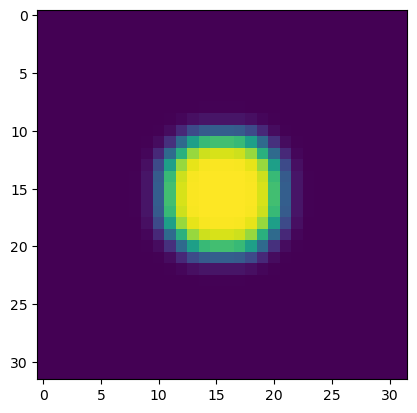

In [21]:
import matplotlib.pyplot as plt
plt.imshow(get_default_probe())

In [14]:
import torch

tensor1 = torch.ones(1, 32, 32)
tensor2 = torch.ones(128, 32, 32)

result = tensor1 + tensor2
print(result.shape)  # Output: torch.Size([128, 32, 32])

torch.Size([128, 32, 32])


In [25]:
(diffracted_batch[0, 0, ...] * intensity_scale)**2


tensor([[26.0000, 13.0000,  4.0000,  ..., 48.0000, 55.0000, 27.0000],
        [ 5.0000,  1.0000,  2.0000,  ..., 46.0000, 27.0000, 17.0000],
        [ 7.0000, 12.0000, 16.0000,  ...,  5.0000,  2.0000,  0.0000],
        ...,
        [71.0000, 71.0000, 99.0000,  ..., 70.0000, 47.0000, 51.0000],
        [33.0000, 31.0000, 35.0000,  ..., 75.0000, 29.0000, 26.0000],
        [28.0000, 17.0000, 18.0000,  ..., 42.0000, 36.0000, 23.0000]])

/tmp/ipykernel_1779777/3174295518.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(diffracted_batch[20, 0, ...]), cmap = 'viridis')


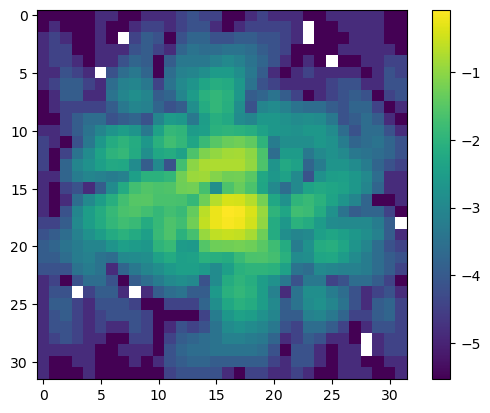

In [61]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.log(diffracted_batch[20, 0, ...]), cmap = 'viridis')
plt.colorbar()

In [10]:
# import torch
# import torch.nn.functional as F

# def gaussian_kernel(kernel_size, sigma):
#     x = torch.arange(kernel_size) - (kernel_size - 1) / 2
#     kernel = torch.exp(-x**2 / (2 * sigma**2))
#     kernel = kernel / kernel.sum()
#     return kernel.unsqueeze(0).unsqueeze(0)

# def gaussian_smoothing(input, kernel_size, sigma):
#     kernel = gaussian_kernel(kernel_size, sigma).to(input.device)
#     kernel = kernel.expand(1, 1, kernel_size, kernel_size)
#     return F.conv2d(input, kernel, padding=(kernel_size - 1) // 2)

# def simulate_diffraction(batch):
#     print(f"Input batch shape: {batch.shape}, Data type: {batch.dtype}")
    
#     Y_I = batch[:, 0]  # Extract Y_I from the first channel
#     Y_phi = (batch[:, 1] + batch[:, 2]) / 2  # Calculate Y_phi as the average of the second and third channels
    
#     print(f"Y_I shape: {Y_I.shape}, Data type: {Y_I.dtype}")
#     print(f"Y_phi shape: {Y_phi.shape}, Data type: {Y_phi.dtype}")
    
#     # Create a complex tensor by combining Y_I and Y_phi
#     Y_complex = torch.complex(Y_I, Y_phi)
    
#     print(f"Y_complex shape: {Y_complex.shape}, Data type: {Y_complex.dtype}")
    
#     probe = gaussian_smoothing(probe.unsqueeze(1), kernel_size=5, sigma=1.5).squeeze(1)
    
#     print(f"Probe shape: {probe.shape}, Data type: {probe.dtype}")
    
#     # Apply the illuminate_and_diffract() function
#     X = illuminate_and_diffract(Y_complex, probe)
    
#     print(f"Diffracted X shape: {X.shape}, Data type: {X.dtype}")
    
#     # Stack the output along the channel dimension to match the input shape (3 channels)
#     diffracted_batch = X.repeat(1, 3, 1, 1)
    
#     print(f"Diffracted batch shape: {diffracted_batch.shape}, Data type: {diffracted_batch.dtype}")
    
#     return diffracted_batch